In [1]:
import os
from PIL import Image
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,6) # set diagram size
import matplotlib.image as mpimg

In [3]:
%matplotlib inline

In [4]:
dataset_location = '/home/dawars/datasets/Hand/SyntheticHand/'

## Read images

In [5]:
dataset = 'Train1'
gender = 'female'
person = '2'

In [6]:
url = os.path.join(dataset_location, dataset, gender, person)
print(url)

/home/dawars/datasets/Hand/SyntheticHand/Train1/female/2


## Read joint locations

In [7]:
joints_list = []
with open(os.path.join(url, 'joints.txt')) as joints:
    for line in joints:
        arr = line.split(' ')
        if str(arr[0]) == '-1': continue
        joints_list.append(arr)

In [8]:
img=cv2.imread(os.path.join(url, 'Depth', '0000002.png'))

In [9]:
def show_img(in_img, joints):
    image = in_img.copy()
    for joint in joints:
        v = int(float(joint[4]))
        u = int(float(joint[5]))
        image[u-2:u+2, v-2:v+2, 0]=255
    imgplot = plt.imshow(image)


In [10]:
def show_img_k(i, joints):
    img = cv2.imread(os.path.join(url, 'Depth', '000000'+str(i)+'.png'))
    start = 20*(i-1)
    end = 20*(i)
    print("showing points from {} to {}".format(start, end))
    return show_img(img, joints[start:end])

showing points from 0 to 20


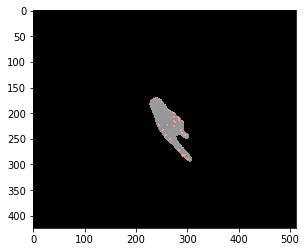

In [11]:
show_img_k(1, joints_list)

showing points from 20 to 40


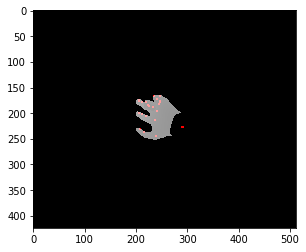

In [12]:
show_img_k(2, joints_list)

showing points from 40 to 60


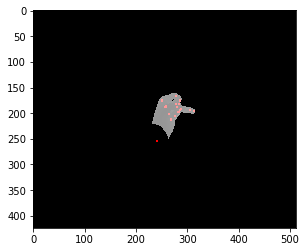

In [13]:
show_img_k(3, joints_list)

showing points from 60 to 80


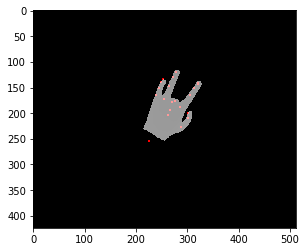

In [14]:
show_img_k(4, joints_list)

## Read training images

In [15]:
img_urls = [] # features
joints = []   # labels

In [16]:
datasets = ['Train1']
genders = ['female', 'male', 'new_male']

In [17]:
for dataset in datasets:
    for gender in genders:
        path = os.path.join(dataset_location, dataset, gender)
        for person in os.listdir(path):
            if int(person) > 10: # reduce dataset size
                continue
            with open(os.path.join(path, person, 'joints.txt')) as joint_file:
                # read joints
                joint_list = []
                for line in joint_file:
                    split = line.split(' ')
                    
                    if str(split[0]) == '-1': continue # skip finger orientation/angles

                    joint_list.append(float(split[4]))
                    joint_list.append(float(split[5]))
                    
                    if split[0] == '19': # if last join in hand
                        joints.append(joint_list)
                        joint_list = []

            depth_path = os.path.join(path, person, 'Depth')
            for filename in sorted(os.listdir(depth_path)):

                # read file names
                img_urls.append(os.path.join(depth_path, filename))
            

In [18]:
len(img_urls)

35122

### Image urls

In [19]:
img_urls[:10]

['/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000001.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000002.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000003.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000004.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000005.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000006.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000007.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000008.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000009.png',
 '/home/dawars/datasets/Hand/SyntheticHand/Train1/female/1/Depth/0000010.png']

### Joints
Joint locations corresponding to the first url

Format:
[x1, y1, x2, y2, ..., x20, y20]

In [20]:
joints[0]

[245.7889404296875,
 147.00003051757812,
 253.7949981689453,
 159.42068481445312,
 259.1513671875,
 169.52886962890625,
 224.83738708496094,
 158.62103271484375,
 234.92593383789062,
 167.94039916992188,
 246.81382751464844,
 180.07789611816406,
 262.8531799316406,
 221.11253356933594,
 249.0639190673828,
 210.65565490722656,
 233.0926513671875,
 190.93128967285156,
 245.00872802734375,
 228.2185516357422,
 231.49215698242188,
 218.5717315673828,
 220.73825073242188,
 205.8639373779297,
 220.16217041015625,
 236.32139587402344,
 231.94805908203125,
 239.57716369628906,
 241.1905975341797,
 140.869140625,
 218.94979858398438,
 154.064208984375,
 266.596923828125,
 223.16183471679688,
 246.23883056640625,
 226.71600341796875,
 219.40432739257812,
 232.4386749267578,
 283.9532775878906,
 226.60496520996094]

### Loading images

Not a good idea to load all at once

In [21]:
list_of_imgs = []
for img in img_urls:
    if not img.endswith(".png"):
        continue
    a = cv2.imread(img)
    #print(a.shape) # check the size
    if a is None:
        print("Unable to read image", img)
        continue
    list_of_imgs.append(a.flatten())
train_data = np.array(list_of_imgs)

Making sure the images have the right dimensions

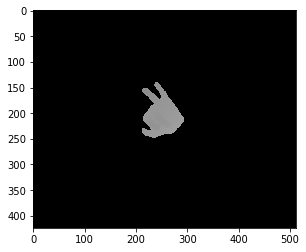

In [23]:
plt.imshow(train_data[0].reshape(424, 512, 3))